### MLP for analytes classification on the upper part of the spectra
#### Edgar Acuna
#### July 2020

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

In [2]:
#loading the data
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)

In [3]:
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)

In [4]:
dfset3=dfset1.copy()
dfset3=dfset3.iloc[:,1200:1701]
print(dfset3.shape)
b=pd.DataFrame(dfset3)
b.head()

(18000, 501)


,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.044839,0.044504,0.044154,0.04394,0.044044,0.044416,0.044756,0.044951,0.045037,0.045256,...,0.053219,0.053131,0.053091,0.053140,0.053249,0.053325,0.053364,0.053356,0.053500,0.055986
1,0.755510,0.756430,0.752470,0.75328,0.759700,0.751290,0.749540,0.756180,0.749370,0.752550,...,0.754260,0.751040,0.753630,0.754490,0.752980,0.755760,0.752910,0.755320,0.753030,0.753230
2,0.107740,0.108720,0.109150,0.10921,0.109170,0.109090,0.109170,0.109530,0.110020,0.110340,...,0.260320,0.259590,0.258910,0.258210,0.257440,0.256580,0.255700,0.254800,0.254160,0.257110
3,0.102290,0.102800,0.103180,0.10344,0.103600,0.103610,0.103540,0.103460,0.103280,0.102990,...,0.257600,0.256890,0.256160,0.255370,0.254540,0.253720,0.252880,0.251970,0.251070,0.250190
4,0.015970,0.014135,0.013994,0.01475,0.015653,0.015542,0.016292,0.013449,0.016569,0.015597,...,0.025036,0.024307,0.024636,0.022298,0.023536,0.025714,0.025306,0.025062,0.023609,0.023901


In [5]:
# Configuration options
feature_vector_length = 501
num_classes = 18000

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(b,y, test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

Train dimension:
(12600, 501)
Test dimension:
(5400, 501)


In [7]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.2, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (501,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 501)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               200800    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_2 (Dense)              (None, 18000)             918000    
Total params: 1,138,850
Trainable params: 1,138,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
202/202 [==============================] - 3s 15ms/step - loss: 5.8788 - accuracy: 0.0206 - val_loss: 3.8186 - val_accuracy: 0.0238
Epoch 2/100
202/202 [==============================] - 3s 12ms/step - loss: 3.7776 - accuracy: 0.0291 - val_loss: 3.7009 - val_accuracy: 0.0258
Epoch 3/100
202/202 [==============================] - 2s 12ms/step - loss: 3.6976 - accuracy: 0.0269 - val_loss: 3.6927 - val_accuracy: 0.0306
Epoch 4/100
202/202 [==============================] - 2s 12ms/step - loss: 3.6947 - accuracy: 0.0267 - val_loss: 3.6894 - val_accuracy: 0.0218
Epoch 5/100
202/202 [==============================] - 2s 12ms/step - loss: 3.6936 - accuracy: 0.0282 - val_loss: 3.6976 - val_accuracy: 0.0254
Epoch 6/100
202/202 [==============================] - 2s 12ms/step - loss: 3.6896 - accuracy: 0.0315 - val_loss: 3.6939 - val_accuracy: 0.0202
Epoch 7/100
202/202 [==============================] - 2s 12ms/step - loss: 3.6832 - accuracy: 0.0350 - val_loss: 3.6542 - val_accuracy:

In [9]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

169/169 [==============================] - 1s 6ms/step - loss: 2.6331 - accuracy: 0.2557
[2.6331124305725098, 0.2557407319545746]
Test results - Loss: 2.6331124305725098 - Accuracy: 0.2557407319545746%


### 2.  Classification of the first analyte

In [10]:
labels=list(range(1,41))

In [11]:
yclass=y.copy()
yclass[yclass!=1]=0
X_train, X_test, yclass_train, yclass_test = train_test_split(b,yclass,test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
Y_train = to_categorical(yclass_train, num_classes)
Y_test = to_categorical(yclass_test, num_classes)

Train dimension:
(12600, 501)
Test dimension:
(5400, 501)


In [12]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.3, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (501,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 501)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               200800    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_5 (Dense)              (None, 18000)             918000    
Total params: 1,138,850
Trainable params: 1,138,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), keras.metrics.Precision(name="precision"),keras.metrics.Recall(name="recall")])
baseline_history=model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1, validation_split=0.2)

Epoch 1/50
101/101 [==============================] - 5s 45ms/step - loss: 4.3353 - accuracy: 1.0000 - precision: 0.8824 - recall: 0.4442 - val_loss: 0.4220 - val_accuracy: 1.0000 - val_precision: 0.9715 - val_recall: 0.9615
Epoch 2/50
101/101 [==============================] - 4s 44ms/step - loss: 0.2774 - accuracy: 1.0000 - precision: 0.9787 - recall: 0.9712 - val_loss: 0.3195 - val_accuracy: 1.0000 - val_precision: 0.9718 - val_recall: 0.9714
Epoch 3/50
101/101 [==============================] - 5s 45ms/step - loss: 0.2648 - accuracy: 1.0000 - precision: 0.9762 - recall: 0.9759 - val_loss: 0.3055 - val_accuracy: 1.0000 - val_precision: 0.9718 - val_recall: 0.9718
Epoch 4/50
101/101 [==============================] - 4s 44ms/step - loss: 0.2374 - accuracy: 1.0000 - precision: 0.9755 - recall: 0.9755 - val_loss: 0.6785 - val_accuracy: 1.0000 - val_precision: 0.9718 - val_recall: 0.9718
Epoch 5/50
101/101 [==============================] - 4s 42ms/step - loss: 0.2249 - accuracy: 1.0000

In [14]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% -Precision: {test_results[2]}% -Recall: {test_results[3]}%')

169/169 [==============================] - 2s 9ms/step - loss: 0.1127 - accuracy: 1.0000 - precision: 0.9724 - recall: 0.9724
Test results - Loss: 0.1126958355307579 - Accuracy: 0.9999979138374329% -Precision: 0.9724074006080627% -Recall: 0.9724074006080627%


In [15]:
#Function for plotting
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'accuracy','precision','recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1])

    plt.legend()

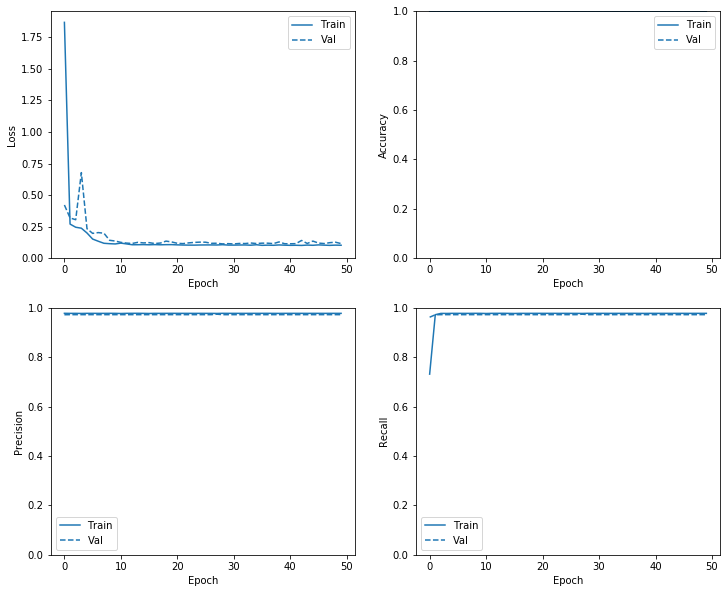

In [16]:
plot_metrics(baseline_history)

In [17]:
#Computing F1-score
train_features = np.array(X_train)
test_features = np.array(X_test)
train_labels=np.array(yclass_train)
test_labels=np.array(yclass_test)
print(np.count_nonzero(test_labels==1))
train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
f1_train=sklearn.metrics.f1_score(train_labels, train_predictions_baseline, average=None)
test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
print(np.count_nonzero(test_predictions_baseline==1))
f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average=None)
print('f1_scores, training set',f1_train,'f1_scores in testing set',f1_test)

149


C:\Users\eacun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0
f1_scores, training set [0.98791116 0.        ] f1_scores in testing set [0.9860107 0.       ]


In [18]:
#The ROC curve
fp, tp, _ = sklearn.metrics.roc_curve(train_labels, train_predictions_baseline)
fp1, tp1, _ = sklearn.metrics.roc_curve(test_labels, test_predictions_baseline)
roc_auc = sklearn.metrics.auc(fp,tp)
roc_auc1 = sklearn.metrics.auc(fp1,tp1)

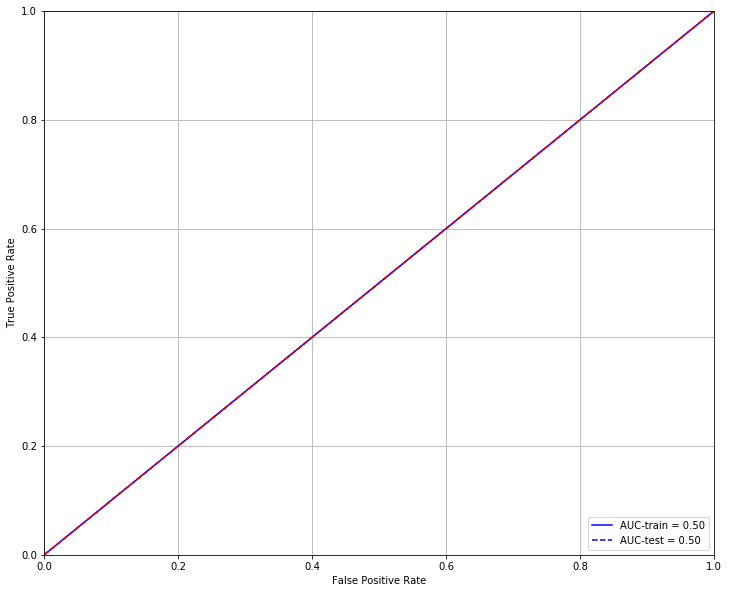

In [19]:
fig, ax = plt.subplots(1, 1)
ax.plot(fp, tp, 'b', label='AUC-train = %0.2f'% roc_auc)
ax.plot(fp1, tp1, 'b--', label='AUC-test = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()